In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
banksim = pd.read_csv('../data/bank/bs140513_032310.csv')
banksimnet = pd.read_csv('../data/bank/bsNET140513_032310.csv')
banksim.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
step           594643 non-null int64
customer       594643 non-null object
age            594643 non-null object
gender         594643 non-null object
zipcodeOri     594643 non-null object
merchant       594643 non-null object
zipMerchant    594643 non-null object
category       594643 non-null object
amount         594643 non-null float64
fraud          594643 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [4]:
banksim = banksim.drop(labels= ['zipcodeOri','zipMerchant'], axis=1)
banksim.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0


In [5]:
banksim.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [45]:
banksim_groupedby_fraud = banksim.groupby('fraud')
banksim_groupedby_fraud.agg({'amount': ['count', 'sum', 'mean']} )

amount                         
        count          sum        mean
fraud                                 
0      587443  18708432.56   31.847230
1        7200   3822671.17  530.926551

In [7]:
banksim_groupedby_gender = banksim.groupby('gender')
banksim_groupedby_gender.agg({'amount': 'mean', 'fraud': 'sum'})

,amount,fraud
gender,,
'E',36.627623,7
'F',39.213044,4758
'M',36.308094,2435
'U',31.508932,0


In [8]:
banksim_groupedby_merchant = banksim.groupby('merchant')
banksim_groupedby_merchant.agg({'amount': 'mean', 'fraud': 'sum'}).head()

,amount,fraud
merchant,,
'M1053599405',103.072322,0
'M117188757',105.102381,0
'M1198415165',94.622911,358
'M1294758098',289.667120,184
'M1313686961',44.593586,0


In [9]:
banksim_groupedby_category = banksim.groupby('category')
banksim_groupedby_category.agg({'amount': 'count', 'fraud': 'sum'})

,amount,fraud
category,,
'es_barsandrestaurants',6373,120
'es_contents',885,0
'es_fashion',6454,116
'es_food',26254,0
'es_health',16133,1696
'es_home',1986,302
'es_hotelservices',1744,548
'es_hyper',6098,280
'es_leisure',499,474


In [10]:
banksim_groupedby_age = banksim.groupby('age')
banksim_groupedby_age.agg({'amount': 'count', 'fraud': 'sum'})

,amount,fraud
age,,
'0',2452,48
'1',58131,689
'2',187310,2344
'3',147131,1755
'4',109025,1410
'5',62642,686
'6',26774,261
'U',1178,7


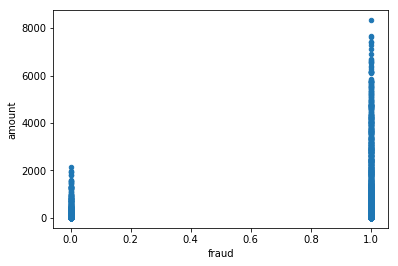

In [11]:
banksim.plot( x='fraud', y= 'amount', kind='scatter')

In [12]:
mapping = {"'M'" : 0, "'F'": 1, "'U'":2, "'E'":3}
banksim_replace = banksim.replace ({'gender': mapping})
banksim_replace.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151','4',0,'M348934600','es_transportation',4.55,0
1,0,'C352968107','2',0,'M348934600','es_transportation',39.68,0
2,0,'C2054744914','4',1,'M1823072687','es_transportation',26.89,0
3,0,'C1760612790','3',0,'M348934600','es_transportation',17.25,0
4,0,'C757503768','5',0,'M348934600','es_transportation',35.72,0


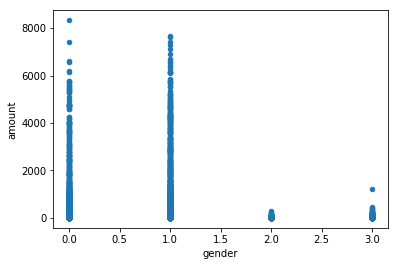

In [13]:
banksim_replace.plot(x='gender',y='amount', kind='scatter')

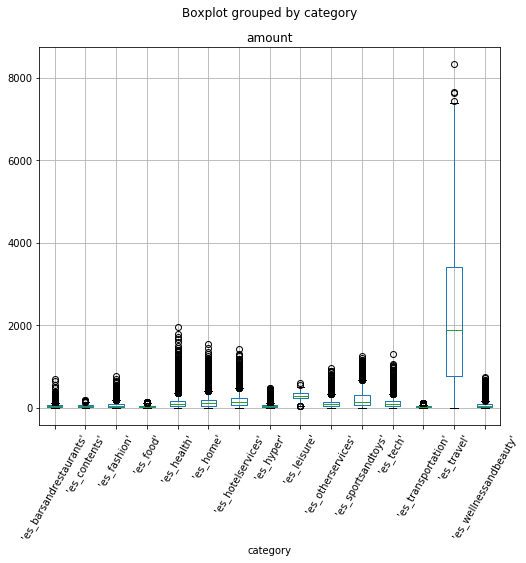

In [14]:
banksim_replace.boxplot('amount','category', rot=60,figsize= (8,7))

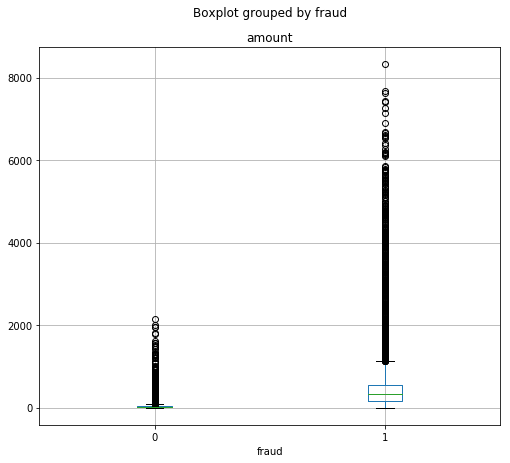

In [15]:
banksim_replace.boxplot('amount','fraud',figsize= (8,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11691e208>,
      dtype=object)

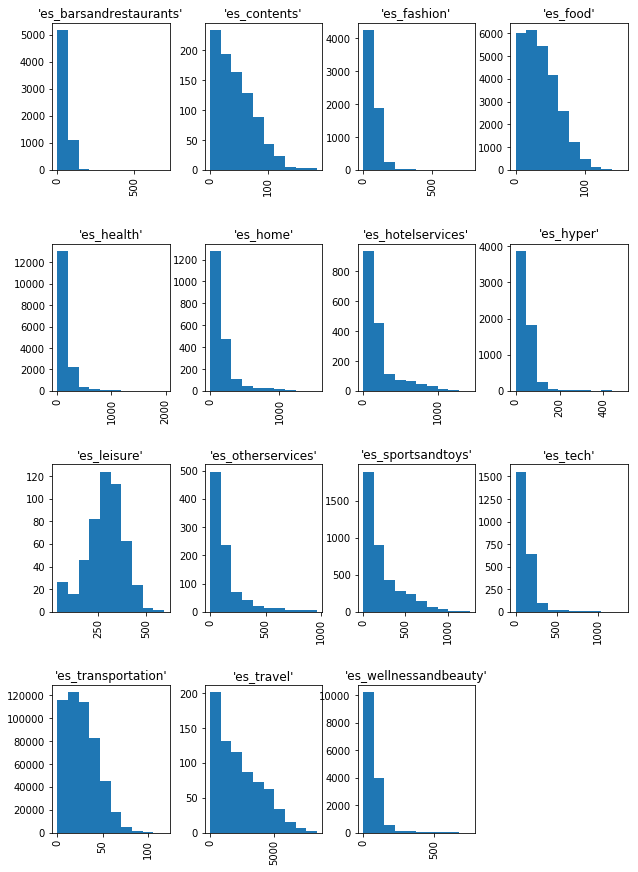

In [16]:
banksim_replace.hist(column='amount', by='category',figsize= (10,15))

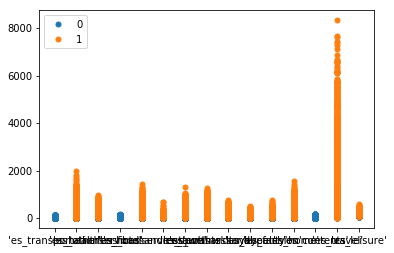

In [17]:
fig, ax = plt.subplots()
groups = banksim_replace.groupby('fraud')
for name, group in groups:
    ax.plot(group.category, group.amount, marker='o', linestyle='', ms=5, label=name)
ax.legend()
plt.show()

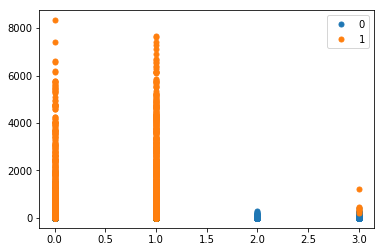

In [18]:
fig, ax = plt.subplots()
groups = banksim_replace.groupby('fraud')
for name, group in groups:
    ax.plot(group.gender, group.amount, marker='o', linestyle='', ms=5, label=name)
ax.legend()
plt.show()

In [19]:
banksim_fraud = banksim_replace.loc[banksim_replace['fraud']==1]

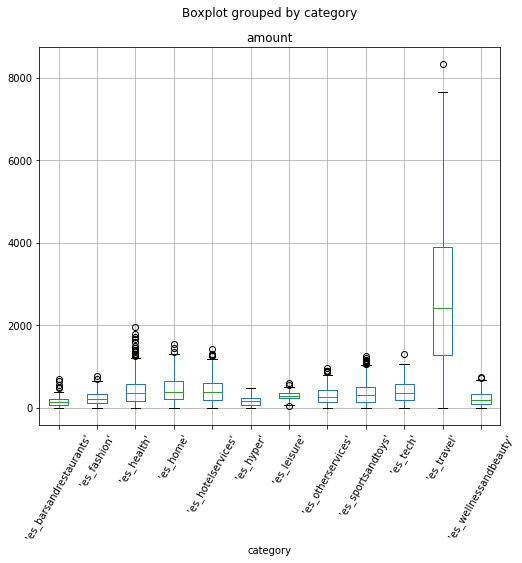

In [20]:
banksim_fraud.boxplot('amount','category', rot=60,figsize= (8,7))

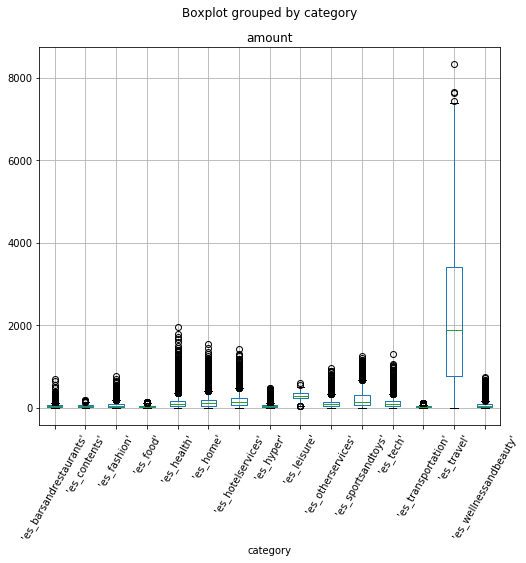

In [21]:
banksim_replace.boxplot('amount','category', rot=60,figsize= (8,7))

In [22]:
banksim_categorieswithfraud1 = banksim_replace.loc[banksim_replace['category'] != "'es_contents'"]
banksim_categorieswithfraud2 = banksim_categorieswithfraud1.loc[banksim_replace['category'] != "'es_food'"]
banksim_categorieswithfraud3 = banksim_categorieswithfraud2.loc[banksim_replace['category'] != "'es_transportation'"]
banksim_catwithfraud3_groupedby_cat = banksim_categorieswithfraud3.groupby('category')
banksim_catwithfraud3_groupedby_cat.agg({'amount': 'mean', 'fraud': 'sum'})


,amount,fraud
category,,
'es_barsandrestaurants',43.461014,120
'es_fashion',65.666642,116
'es_health',135.621367,1696
'es_home',165.670846,302
'es_hotelservices',205.614249,548
'es_hyper',45.970421,280
'es_leisure',288.911303,474
'es_otherservices',135.881524,228
'es_sportsandtoys',215.715280,1982


In [23]:
banksim_catwithfraud3_groupedby_cat.describe()

step                                            \
                           count        mean        std  min    25%    50%   
category                                                                     
'es_barsandrestaurants'   6373.0   75.210576  50.715526  0.0  31.00   68.0   
'es_fashion'              6454.0   95.426092  51.869283  0.0  50.00  100.0   
'es_health'              16133.0  100.636211  50.144527  0.0  60.00  105.0   
'es_home'                 1986.0   89.760322  51.929083  0.0  45.00   89.0   
'es_hotelservices'        1744.0   92.966170  51.889314  0.0  49.00   94.0   
'es_hyper'                6098.0   77.837652  51.471025  0.0  33.00   72.0   
'es_leisure'               499.0   84.667335  52.149553  1.0  37.00   84.0   
'es_otherservices'         912.0   70.445175  52.339192  0.0  24.75   58.0   
'es_sportsandtoys'        4002.0   81.332834  51.027828  0.0  36.00   78.5   
'es_tech'                 2370.0   95.034177  51.998402  0.0  51.00   98.0   
'es_travel'                728.0   85.104396  52.144547  0.0  37.75   85.0   
'es_wellnessandbeauty'   15086.0   90.658094  50.682498  0.0  48.00   90.0   

                                        gender            ...     amount  \
                           75%    max    count      mean  ...        75%   
category                                                  ...              
'es_barsandrestaurants'  115.0  179.0   6373.0  0.562686  ...    61.4900   
'es_fashion'             140.0  179.0   6454.0  0.567090  ...    91.8175   
'es_health'              144.0  179.0  16133.0  0.586872  ...   170.5500   
'es_home'                137.0  179.0   1986.0  0.570493  ...   197.4975   
'es_hotelservices'       140.0  179.0   1744.0  0.588303  ...   229.8950   
'es_hyper'               121.0  179.0   6098.0  0.556248  ...    60.6775   
'es_leisure'             127.5  179.0    499.0  0.651303  ...   353.9050   
'es_otherservices'       113.0  179.0    912.0  0.559211  ...   154.1625   
'es_sportsandtoys'       123.0  179.0   4002.0  0.613193  ...   309.3100   
'es_tech'                142.0  179.0   2370.0  0.560759  ...   158.3325   
'es_travel'              132.0  179.0    728.0  0.626374  ...  3423.9975   
'es_wellnessandbeauty'   134.0  179.0  15086.0  0.563304  ...    86.9650   

                                    fraud                                     \
                             max    count      mean       std  min  25%  50%   
category                                                                       
'es_barsandrestaurants'   695.63   6373.0  0.018829  0.135933  0.0  0.0  0.0   
'es_fashion'              773.61   6454.0  0.017973  0.132865  0.0  0.0  0.0   
'es_health'              1972.81  16133.0  0.105126  0.306725  0.0  0.0  0.0   
'es_home'                1540.23   1986.0  0.152064  0.359174  0.0  0.0  0.0   
'es_hotelservices'       1429.04   1744.0  0.314220  0.464338  0.0  0.0  0.0   
'es_hyper'                488.02   6098.0  0.045917  0.209322  0.0  0.0  0.0   
'es_leisure'              592.03    499.0  0.949900  0.218371  0.0  1.0  1.0   
'es_otherservices'        964.30    912.0  0.250000  0.433250  0.0  0.0  0.0   
'es_sportsandtoys'       1258.33   4002.0  0.495252  0.500040  0.0  0.0  0.0   
'es_tech'                1305.35   2370.0  0.066667  0.249496  0.0  0.0  0.0   
'es_travel'              8329.96    728.0  0.793956  0.404740  0.0  1.0  1.0   
'es_wellnessandbeauty'    750.51  15086.0  0.047594  0.212912  0.0  0.0  0.0   

                                    
                          75%  max  
category                            
'es_barsandrestaurants'  0.00  1.0  
'es_fashion'             0.00  1.0  
'es_health'              0.00  1.0  
'es_home'                0.00  1.0  
'es_hotelservices'       1.00  1.0  
'es_hyper'               0.00  1.0  
'es_leisure'             1.00  1.0  
'es_otherservices'       0.25  1.0  
'es_sportsandtoys'       1.00  1.0  
'es_tech'                0.00  1.0  
'es_travel'              1.00  1.0

In [24]:
banksim_catgroupfraud=banksim_categorieswithfraud3.groupby('fraud')
banksim_catgroupfraud.agg({'amount':'max'})

,amount
fraud,
0,2144.86
1,8329.96


In [25]:
totally_fraud=banksim_categorieswithfraud3.loc[banksim_categorieswithfraud3['amount']>2144.86]
totally_fraud2 = totally_fraud.groupby('fraud')
totally_fraud2.agg({'amount':'count'})

,amount
fraud,
1,321


In [37]:
banksim_replace_gr_age=banksim_replace.groupby('age')
banksim_replace_gr_age.agg({'amount':'count', 'fraud':'sum'})

,amount,fraud
age,,
'0',2452,48
'1',58131,689
'2',187310,2344
'3',147131,1755
'4',109025,1410
'5',62642,686
'6',26774,261
'U',1178,7


In [31]:
banksim_agecount = banksim_replace['age'].value_counts()
banksim_agecount

'2'    187310
'3'    147131
'4'    109025
'5'     62642
'1'     58131
'6'     26774
'0'      2452
'U'      1178
Name: age, dtype: int64

In [46]:
banksim_agecount.describe()

step                                                          gender  \
        count       mean        std  min   25%    50%    75%    max     count   
age                                                                             
'0'    2452.0  99.971044  51.150584  0.0  58.0  106.0  144.0  179.0    2452.0   
'1'   58131.0  94.464107  51.206534  0.0  51.0   97.0  139.0  179.0   58131.0   
'2'  187310.0  94.752704  51.036534  0.0  52.0   97.0  139.0  179.0  187310.0   
'3'  147131.0  95.425743  51.008459  0.0  53.0   98.0  140.0  179.0  147131.0   
'4'  109025.0  95.227416  51.006987  0.0  53.0   98.0  140.0  179.0  109025.0   
'5'   62642.0  94.433782  51.201422  0.0  51.0   97.0  139.0  179.0   62642.0   
'6'   26774.0  95.020505  50.955915  0.0  52.0   97.0  139.0  179.0   26774.0   
'U'    1178.0  99.191002  49.083841  0.0  60.0  102.0  141.0  179.0    1178.0   

               ...   amount              fraud                                \
         mean  ...      75%      max     count      mean       std  min  25%   
age            ...                                                             
'0'  0.757341  ...  44.7075  4170.56    2452.0  0.019576  0.138566  0.0  0.0   
'1'  0.570986  ...  42.5300  7134.39   58131.0  0.011853  0.108223  0.0  0.0   
'2'  0.561006  ...  42.5100  8329.96  187310.0  0.012514  0.111164  0.0  0.0   
'3'  0.535428  ...  42.6300  6679.23  147131.0  0.011928  0.108563  0.0  0.0   
'4'  0.537913  ...  42.6900  6260.89  109025.0  0.012933  0.112985  0.0  0.0   
'5'  0.544379  ...  42.1600  6590.61   62642.0  0.010951  0.104074  0.0  0.0   
'6'  0.520617  ...  42.3975  7432.48   26774.0  0.009748  0.098253  0.0  0.0   
'U'  3.000000  ...  42.4550  1215.63    1178.0  0.005942  0.076889  0.0  0.0   

                    
     50%  75%  max  
age                 
'0'  0.0  0.0  1.0  
'1'  0.0  0.0  1.0  
'2'  0.0  0.0  1.0  
'3'  0.0  0.0  1.0  
'4'  0.0  0.0  1.0  
'5'  0.0  0.0  1.0  
'6'  0.0  0.0  1.0  
'U'  0.0  0.0  1.0  

[8 rows x 32 columns]